# Import Libraries

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Loading the data


In [4]:
wine = pd.read_csv('C:/Users/ISHMO_CT/Desktop/projects/clustering/modified_wine - modified_wine.csv')
#slicing
df = wine[['malic_acid', 'flavanoids']]
df.head()
#wine.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [ ]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0


We are not going to use a target/y-vector in this dataset! We are interested in finding clusters of wine using the malic_acid and flavanoids features.


The first step when doing KMeans clustering is to scale our data.

Thinking about how the KMeans algorithm works... Why do you think scaling would be important?

# Scaling the data

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)
scaled_df
#fit_transform (fitting and transforming at the same time)

array([[-2.92034878e-01,  8.69730960e-01],
       [-2.28017884e-01,  5.51478779e-01],
       [ 3.02408634e-01,  1.06068227e+00],
       [-7.25480428e-02,  1.32589242e+00],
       [-2.46308454e-01,  1.21980836e+00],
       [-1.45710321e-01,  2.96877034e-01],
       [ 1.10357653e-01,  2.86268628e-01],
       [-3.56051872e-01,  7.84863712e-01],
       [-6.21265131e-01,  9.65206614e-01],
       [ 1.19502938e-01,  1.14554952e+00],
       [-5.02376428e-01,  2.01401380e-01],
       [-2.73744308e-01,  5.51478779e-01],
       [-2.73744308e-01,  1.53806054e+00],
       [-1.45710321e-01,  1.48501851e+00],
       [-2.00582030e-01,  7.10604869e-01],
       [-9.99838972e-02,  9.54598208e-01],
       [-4.20068865e-01,  1.23041676e+00],
       [-4.01778296e-01,  1.79266228e+00],
       [-3.65197156e-01,  9.86423426e-01],
       [-1.54855606e-01,  6.78779651e-01],
       [-3.92633011e-01,  1.37750944e-01],
       [-2.00582030e-01,  3.92352689e-01],
       [ 1.89048051e-02,  4.66611531e-01],
       [-2.

**KMeans**

One of the drawbacks of the KMeans algorithm is that there is no clear way to determine how many clusters to use. In the graph below, we can visually check how many clusters we think we should have since our data is only 2-dimensional.


**Note:  KMeans can fit on any number of columns!**

In this example we are only fitting on two columns for the purpose of plotting, however, realistically, most of the data we work with will be multi-dimensional. If possible, we can use domain knowledge or work with a subject matter expert to determine which features we should include and how many clusters are reasonable. We can also use scores such as the Silhouette Score to determine how well-defined our clusters are -- more on this later.

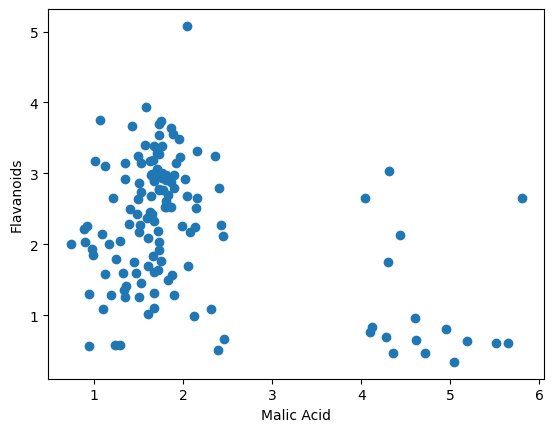

In [ ]:
# Visualize data
plt.scatter(df['malic_acid'], df['flavanoids'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids');

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier

# knn = KNeighborsClassifier(n_neighbors=3)

# #Hyperparameter tuning
# dec_tree = DecisionTreeClassifier(max_depth=3) #defining max_depth

In [ ]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2) #kmeans algorithm: define k; data(X)
kmeans4= KMeans(n_clusters = 4)

#Fitting the Kmeans model
kmeans.fit(scaled_df)
kmeans4.fit(scaled_df)

KMeans(n_clusters=4)

In [ ]:
kmeans.labels_
kmeans4.labels_

array([0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 2, 2, 2, 2, 0, 2, 3, 0, 3, 2, 2, 2, 0, 2,
       0, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 0,
       3, 2, 3, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 0, 1, 1, 1, 3, 0,
       3, 3, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1], dtype=int32)

In [ ]:
print(kmeans.inertia_)
kmeans4.inertia_

126.50653793844842


47.86640731961272

<ipython-input-32-f38357d0b054>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


,malic_acid,flavanoids,cluster
0,1.71,3.06,0
1,1.78,2.76,0
2,2.36,3.24,0
3,1.95,3.49,0
4,1.76,3.39,0
...,...,...,...
129,4.60,0.96,1
130,2.39,0.51,1
131,5.65,0.61,1
132,4.28,0.69,1


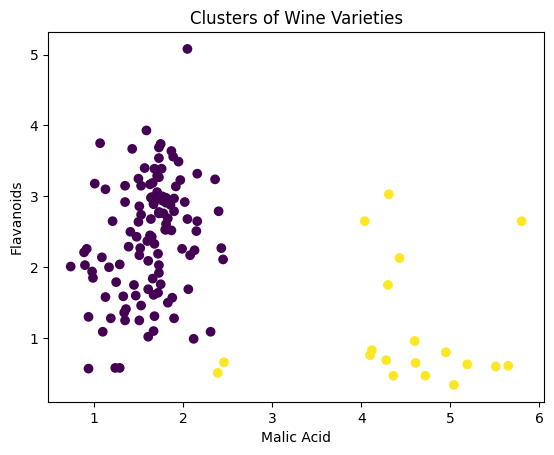

In [ ]:
# Save the cluster labels to the dataframe
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');
df

# Clustering Evaluation Metrics

In unsupervised learning techniques, such as clustering, there is no reasonable way to measure how good our predictions are since we do not have any true labels to compare to our predictions.

For example, let's say you and your friend are in charge of clustering various restaurants together. You group restaurants based on the type of food that is served, while your friend groups the restaurants based on ratings. Which of these clustering techniques is correct? Is there even a correct technique?

We kind of get around this by creating heuristic metrics to evaluate the clusters that allow us to compare models. However, this is still not perfect, and we may never be able to know how good our models are. It is important to consider working with Subject Matter Experts to confirm the results of your algorithm and think critically about decisions made as a result of your algorithm.

# Clustering Metrics

Explore methods to choose an optimal number of clusters (k value)


1.   Compare various models using an Inertia elbow plot
2.   Compare various models using the Silhouette Score

# Inertia

"Tightness" is a measure of how similar the data points in a given cluster are to the other data points in the same cluster.  One way to evaluate the tightness of clusters is using a plot of the inertia of different numbers of clusters (k values). The inertia of a clustering is determined by calculating the distance between each point and its cluster's centroid, squaring those distances, and summing the squares.  This determines the 'tightness' of each cluster.

While tight clusters (indicated by a low inertia) are desirable, the lowest inertia is not the best clustering. To understand why, consider that the inertia will always go down if we add more clusters. The more clusters, the lower the inertia score.  To take this to the extreme, consider the maximum number of clusters:  if each cluster only consisted of one data point, the inertia would be as low as possible.  Having too many clusters is not useful and defeats the practical purpose of clustering in the first place.  The best clustering is a balance between the lowest number of clusters and the lowest inertia.

# Elbow plot (Elbow method)

To find the best balance between tightness of clusters and the number of clusters,  we create a plot of the inertia for several choices of k (number of clusters) and look for the "elbow" in the graph.  The elbow is the place where the dramatic reduction in inertia starts to level off. Fortunately for us, KMeans stores the inertia of the clustering as an attribute we can directly access after the model is fitted.

 The code below shows how to produce a plot of inertia vs. clusters:

process of building a KMeans clustering model

FOR LOOP

1. instantiate an object to hold the algorithm - kmeans= KMeans(n_clusters=?)
2. Fitting of the model on the data kmeans.fit(variable holding the data)
3. evaluating (kmeans.inertia_)
4. append to the list.

Text(0, 0.5, 'inertia')

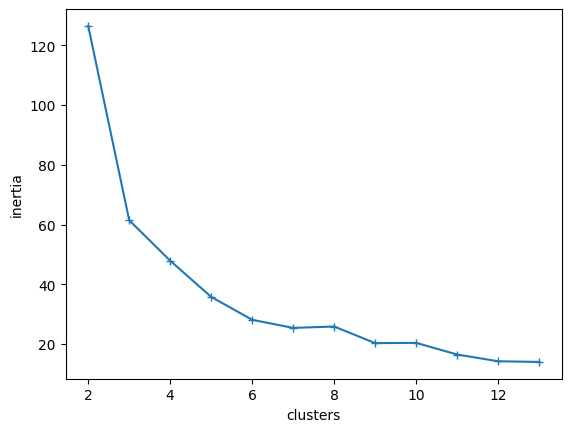

In [ ]:
#Create an empty list of inertias
inertias = []

#Loop through k values between 2 and 13 and store the inertias in the list.
for k in range(2,14):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)

#Visualize scores
plt.plot(range(2,14), inertias, marker = '+')
plt.xlabel('clusters')
plt.ylabel('inertia')
#inertias

In the above line plot we see that the graph starts to level off at 3 clusters.  This looks similar to the bend in an arm which is why it is called the "elbow."  Thus,  3 would be one candidate for a good number of clusters.

Remember, of course, that the best way to determine good clustering is to explore the clusters and consult an subject matter expert.

# Silhouette Score for KMeans
Another way to evaluate our clusters is to use the Silhouette Coefficient (or commonly referred to as the Silhouette Score). The Silhouette Score is a measurement that takes into account both: how tight and how well-separated each cluster is. It does this by calculating the distance between each data point and all other data points in that same cluster and by calculating the distance between each data point and the points in the next closest cluster. The best score is 1 (signaling well-defined & well-separated clusters) and the worst is -1.

From the Scikit-Learn documentation for [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [ ]:
kmeans.inertia_
silhouette_score(scaled_df,kmeans.labels_)

np.float64(0.33076414716344454)

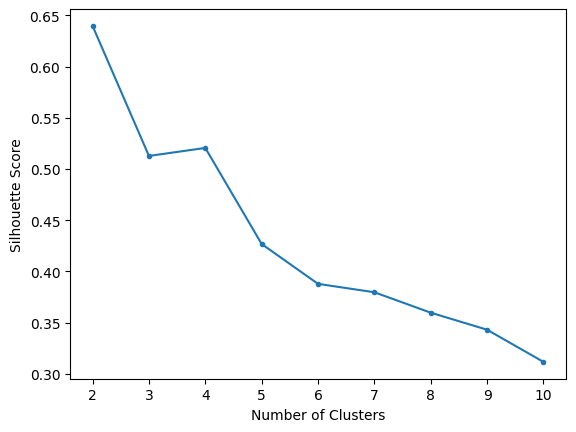

In [ ]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

Based on the plot above, what is the best number of clusters for this data? (Remember that higher silhouette scores are better!)

We can see from the plot above that 2 would be the best number of clusters for our data since it has the highest Silhouette Score.

In [ ]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

np.float64(0.6397847301130692)

In [ ]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

<ipython-input-20-7011ecb20954>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster2'] = kmeans2.labels_
<ipython-input-20-7011ecb20954>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster3'] = kmeans3.labels_


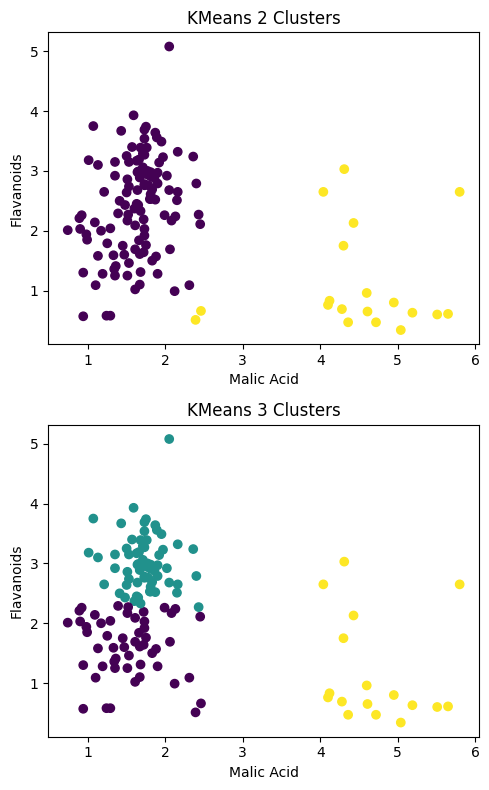

In [ ]:
# Save the cluster labels to the dataframe
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster2'])
axes[0].set_xlabel('Malic Acid')
axes[0].set_ylabel('Flavanoids')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster3'])
axes[1].set_xlabel('Malic Acid')
axes[1].set_ylabel('Flavanoids')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

Practice assignment



In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris
X= iris.data #features
y=iris.target #labels

In [ ]:
scaler_iris = StandardScaler()
X_scaled = scaler_iris.fit_transform(X)

In [ ]:
#instantiating
kmeans_iris= KMeans(n_clusters=3)
#fit the model
kmeans_iris.fit(X_scaled)

KMeans(n_clusters=3)

In [ ]:
kmeans_iris.labels_

array([2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

1. Evaluate the model
2. Visualise the clusters as you compare with the original groundtruth (stored y vector)